In [1]:
import numpy as np # Linear Alg
import pandas as pd # CSV file I/O & data processing

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings 
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
warnings.filterwarnings("ignore")
style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from subprocess import check_output

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
data_dir = '../../input'
# Check what files our dataset contain
print('Our dataset contains the following files: \n')
print(check_output(["ls", data_dir]).decode("utf8"))

Our dataset contains the following files: 

bitcoin_cash_price.csv
bitcoin_dataset.csv
bitcoin_price.csv
bitconnect_price.csv
dash_price.csv
ethereum_classic_price.csv
ethereum_dataset.csv
ethereum_price.csv
iota_price.csv
litecoin_price.csv
monero_price.csv
nem_price.csv
neo_price.csv
numeraire_price.csv
omisego_price.csv
qtum_price.csv
ripple_price.csv
stratis_price.csv
waves_price.csv



In [3]:
ethereum_price = pd.read_csv('{}/ethereum_price.csv'.format(data_dir), parse_dates=['Date'], index_col=0)
ethereum_price.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [4]:
#view the first fifteen rows
ethereum_price.head(15)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-09-05,297.57,318.57,268.29,312.99,"1,551,050,000","28,100,000,000"
2017-09-04,347.13,347.13,279.94,295.17,"1,801,690,000","32,774,000,000"
2017-09-03,350.23,366.49,332.23,347.48,"986,266,000","33,059,800,000"
2017-09-02,387.82,389.35,328.10,348.98,"1,483,600,000","36,601,200,000"
2017-09-01,383.47,390.04,383.47,387.74,"874,222,000","36,182,900,000"
2017-08-31,378.44,386.14,376.35,383.04,"706,254,000","35,701,500,000"
2017-08-30,369.47,388.75,361.97,378.49,"1,333,320,000","34,848,400,000"
2017-08-29,347.96,373.76,347.79,370.67,"1,220,030,000","32,813,200,000"
2017-08-28,350.04,352.05,338.41,347.75,"854,319,000","33,002,700,000"


In [5]:
#view the last fifteen rows
ethereum_price.tail(15)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-21,1.480000,1.560000,1.350000,1.400000,"2,020,970","107,266,000"
2015-08-20,1.250000,1.530000,1.250000,1.460000,"2,843,760","90,809,000"
2015-08-19,1.170000,1.320000,1.170000,1.260000,"1,486,240","84,663,900"
2015-08-18,1.220000,1.330000,1.090000,1.090000,"1,485,680","88,143,200"
2015-08-17,1.580000,1.580000,1.190000,1.200000,"1,942,830","95,819,700"
2015-08-16,1.680000,1.700000,1.090000,1.570000,"3,550,790","102,028,000"
2015-08-15,1.800000,1.880000,1.570000,1.690000,"2,554,360","109,160,000"
2015-08-14,1.810000,2.260000,1.750000,1.830000,"4,637,030","109,594,000"
2015-08-13,1.220000,1.970000,1.170000,1.830000,"4,068,680","73,935,400"


In [6]:
print('Date of newest data: {}'.format(ethereum_price.index[0]))
print('Date of oldest data: {}'.format(ethereum_price.index[-1]))

Date of newest data: 2017-09-05 00:00:00
Date of oldest data: 2015-08-07 00:00:00


In [7]:
eth_ohlc = ['Open', 'High', 'Low', 'Close']

for feat in eth_ohlc:
    print('---------------------------------------------')
    print('Statistics for Ethereum {} values:'.format(feat))
    print(ethereum_price[feat].describe())

---------------------------------------------
Statistics for Ethereum Open values:
count    761.000000
mean      49.895319
std       94.701419
min        0.431589
25%        4.360000
50%       11.110000
75%       17.360000
max      397.590000
Name: Open, dtype: float64
---------------------------------------------
Statistics for Ethereum High values:
count    761.000000
mean      52.372998
std       99.021937
min        0.482988
25%        4.770000
50%       11.340000
75%       18.880000
max      414.760000
Name: High, dtype: float64
---------------------------------------------
Statistics for Ethereum Low values:
count    761.000000
mean      47.483389
std       90.028103
min        0.420897
25%        4.030000
50%       10.750000
75%       16.370000
max      383.470000
Name: Low, dtype: float64
---------------------------------------------
Statistics for Ethereum Close values:
count    761.000000
mean      50.287726
std       95.157500
min        0.434829
25%        4.400000
50%     

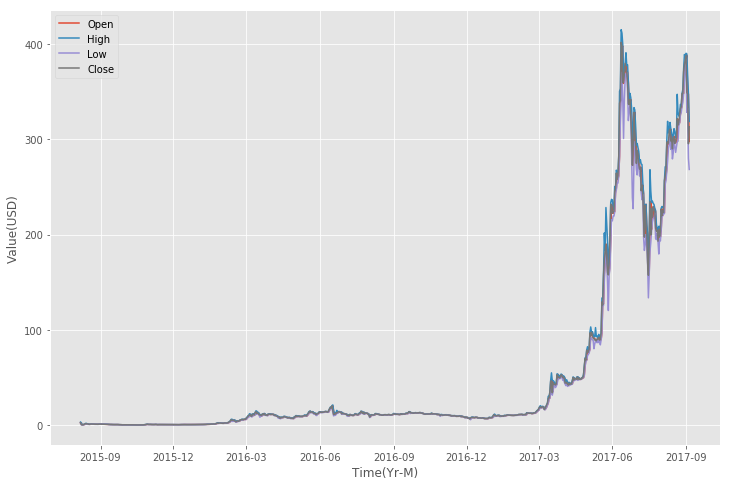

In [8]:
# plotting the open, close, high, low of ethereum on in a line graph
for feat in eth_ohlc:
    plt.plot(ethereum_price[feat], label=feat)
    
plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()

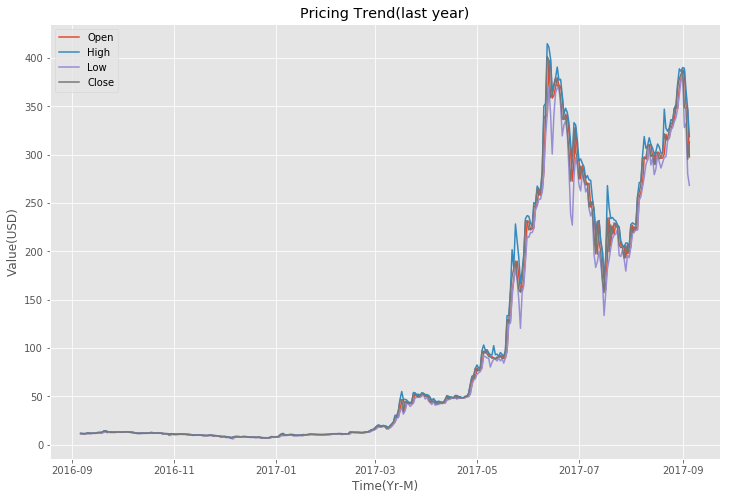

In [9]:
#plotting with recent data of ethereum

n_days = 365 # number of recent days

for feature in eth_ohlc:
    plt.plot(ethereum_price[feature].iloc[:n_days], label=feature)

plt.title('Pricing Trend(last year)')
plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()